Referensi
1. https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
2. https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
3. https://datascience.stackexchange.com/questions/92247/precisionk-and-recallk
4. https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491#:~:text=What%20is%20the%20difference%20between,PCA%20skips%20less%20significant%20components.

Atribusi
1. Fairuza -> Bertanya mengenai **logika membuat fungsi hitung skor dgn pendekatan Word2Vec** dan **cara plotting hasil dimensionality reduction**

In [232]:
# Mengimpor library & package yang digunakan
import math
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Union
from pprint import pprint
from gensim.models import Word2Vec
from IPython.display import display
from collections import Counter, OrderedDict
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [233]:
# Mengimpor file korpus_abstrak.csv
korpus_df = pd.read_csv('korpus_abstrak.csv')

# Menampilkan shape & display dari korpus_abstrak.csv
print(korpus_df.shape)
display(korpus_df)

(469, 5)


,Link,Abstrak,Author,Pub,Ed
0,detail.jsp?id=46123&lokasi=lokal,Analisis Faktor yang Memengaruhi Loyalitas Kon...,Sumarliyanti,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Putu Wuri Handayani
1,detail.jsp?id=46126&lokasi=lokal,Analisis Perilaku Pengguna Dalam Mencapai Kred...,S. Reyneta Carissa Anwar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani
2,detail.jsp?id=46149&lokasi=lokal,Desain Interaksi Aplikasi untuk Mengakomodasi ...,Mila Alief Alya,"Publisher: Depok"": Fakultas Ilmu Komputer Uni...",Harry Budi Santoso S
3,detail.jsp?id=46167&lokasi=lokal,Evaluasi dan Pengembangan Alternatif Desain In...,Ivana Putri,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso
4,detail.jsp?id=45008&lokasi=lokal,Evaluasi Desain Materi Instruksional Berdasark...,Aulia Chairunisa,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Harri Budi Santoso
...,...,...,...,...,...
464,detail.jsp?id=46801&lokasi=lokal,Visualisasi Informasi dari Kemampuan Metakogni...,Resthu Rizfarchan Adisurya,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso
465,detail.jsp?id=4668&lokasi=lokal,Masalah transportasi merupakan suatu masalah y...,Hendrie Gunawan,"Publisher: Depok: Fasilkom UI, 2002 Call Numb...",Widijanto Nugroho
466,detail.jsp?id=4647&lokasi=lokal,Pergerakan benda di atas permukaan es dapat me...,Anita,"Publisher: Depok: Fasilkom UI, 2001 Call Numb...",Widijanto Nugroho
467,detail.jsp?id=4490&lokasi=lokal,"Dewasa ini, bentuk visual mendapat perhatian d...","Helmy A, Muhammad","Publisher: Depok: Fasilkom UI, 1996 Call Numb...",Eko Budiardjo


### **A - Preprocessing (5 Poin)**

Pada bagian ini, Anda diminta untuk melakukan preprocessing pada korpus Anda. Gunakan hasil preprocessing pada bagian-bagian setelah ini

1. [3] Lakukan lowercasing dan tokenisasi. Lowercasing dilakukan dengan fungsi lower() dan tokenisasi dilakukan dengan word_tokenize dari NLTK. Tampilkan 10 abstrak teratas!

In [234]:
# Mengekstrak kolom Abstrak dari korpus
abstrak_sr = korpus_df['Abstrak']

# Melakukan uncasing
abstrak_sr_cleaned = abstrak_sr.str.lower()

# Melakukan tokenisasi
abstrak_sr_cleaned_tokenized = abstrak_sr_cleaned.map(
    lambda abstract: nltk.word_tokenize(abstract)
)

# Menampilkan 10 baris pertama
abstrak_sr_cleaned_tokenized.head(10)

0    [analisis, faktor, yang, memengaruhi, loyalita...
1    [analisis, perilaku, pengguna, dalam, mencapai...
2    [desain, interaksi, aplikasi, untuk, mengakomo...
3    [evaluasi, dan, pengembangan, alternatif, desa...
4    [evaluasi, desain, materi, instruksional, berd...
5    [pengaruh, efek, moderasi, social, feature, da...
6    [rancangan, dan, implementasi, teknologi, intr...
7    [pentingnya, penerapan, teknologi, informasi, ...
8    [analisis, kegiatan, berbagi, pengetahuan, pad...
9    [adaptasi, expectation-confirmation, model, un...
Name: Abstrak, dtype: object

2. [2] Lakukan penghapusan semua karakter selain alfanumerik menggunakan
fungsi isalnum(). Tampilkan 10 abstrak teratas!

In [235]:
# Membersihkan karakter selain alfanumerik
for index, abstrak in abstrak_sr_cleaned_tokenized.iteritems():
    abstrak_sr_cleaned_tokenized.iloc[index] = [word for word in abstrak if word.isalnum()]

abstrak_sr_cleaned_tokenized.head(10)

0    [analisis, faktor, yang, memengaruhi, loyalita...
1    [analisis, perilaku, pengguna, dalam, mencapai...
2    [desain, interaksi, aplikasi, untuk, mengakomo...
3    [evaluasi, dan, pengembangan, alternatif, desa...
4    [evaluasi, desain, materi, instruksional, berd...
5    [pengaruh, efek, moderasi, social, feature, da...
6    [rancangan, dan, implementasi, teknologi, intr...
7    [pentingnya, penerapan, teknologi, informasi, ...
8    [analisis, kegiatan, berbagi, pengetahuan, pad...
9    [adaptasi, model, untuk, memprediksi, pengaruh...
Name: Abstrak, dtype: object

### **B - BM-25 (30 Poin)**

Pada bagian ini, Anda akan dipandu untuk melakukan implementasi retrieval menggunakan BM25 secara langkah demi langkah pada korpus yang telah melalui tahapan pre-processing

1. [2] Untuk setiap abstrak yang telah di-preprocessing, buatlah dictionary dengan key berupa token dan value berupa term frequency. Anda diperkenankan menggunakan library collections, namun Anda tidak wajib menggunakan library ini. Tampilkan dictionary untuk masing-masing dari 10 abstrak teratas

In [236]:
abstrak_sr_preprocessed = abstrak_sr_cleaned_tokenized.copy(deep=True)
N = abstrak_sr_preprocessed.size

# Menghitung total word freq dari abstrak
abstrak_dct_word_freq = Counter()
# Menghitung term freq (tf) dari abstrak
abstrak_dct_tf = dict()

print_counter = 0
for index, abstrak in abstrak_sr_preprocessed.iteritems():
    word_freq = Counter(abstrak)
    abstrak_dct_word_freq += + word_freq
    abstrak_dct_tf[index] = word_freq

    # Mencetak 10 dictionary dari 10 abstrak teratas
    if print_counter < 10:
        print(word_freq, "\n")
        print_counter += 1

Counter({'yang': 10, 'value': 7, 'faktor': 5, 'memengaruhi': 5, 'di': 4, 'dan': 4, 'dalam': 3, 'model': 3, 'perceived': 3, 'secara': 3, 'positif': 3, 'terhadap': 3, 'mana': 3, 'paling': 3, 'kuat': 3, 'satisfaction': 3, 'analisis': 2, 'loyalitas': 2, 'konsumen': 2, 'makanan': 2, 'pada': 2, 'online': 2, 'penelitian': 2, 'yaitu': 2, 'teori': 2, 'diperoleh': 2, 'adalah': 2, 'data': 2, 'emotional': 2, 'fulfilment': 2, 'membeli': 1, 'layanan': 1, 'studi': 1, 'kasus': 1, 'ini': 1, 'dilakukan': 1, 'untuk': 1, 'menganalisis': 1, 'pembelian': 1, 'indonesia': 1, 'digunakan': 1, 'diajukan': 1, 'berasal': 1, 'dari': 1, 'tiga': 1, 'kualitas': 1, 'hubungan': 1, 'perval': 1, 'mobile': 1, 'service': 1, 'quality': 1, 'total': 1, 'responden': 1, 'berhasil': 1, 'sebanyak': 1, '852': 1, 'lengkap': 1, 'tersebut': 1, 'dianalisis': 1, 'menggunakan': 1, 'pendekatan': 1, 'kuantitatif': 1, 'dengan': 1, 'metode': 1, 'structural': 1, 'equation': 1, 'didukung': 1, 'oleh': 1, 'tools': 1, 'amos': 1, 'hasil': 1, 'soci

2. [6] Buatlah daftar vocabulary (token yang unik) dari seluruh abstrak dan hitung document frequency serta inverse document frequency (idf) untuk setiap vocabulary

In [237]:
# Menghitung unique word freq (df) dari abstrak
abstrak_dct_df = Counter()

for abstrak in abstrak_sr_preprocessed:
    word_freq = Counter(set(abstrak))
    abstrak_dct_df += + word_freq

pprint(abstrak_dct_df)

Counter({'yang': 466,
         'dan': 461,
         'ini': 454,
         'dengan': 453,
         'untuk': 453,
         'pada': 390,
         'dalam': 376,
         'dari': 372,
         'menggunakan': 351,
         'penelitian': 340,
         'dapat': 336,
         'hasil': 315,
         'adalah': 307,
         'tersebut': 282,
         'dilakukan': 272,
         'di': 249,
         'bahwa': 246,
         'digunakan': 238,
         'metode': 221,
         'data': 218,
         'oleh': 212,
         'terhadap': 204,
         'satu': 196,
         'merupakan': 193,
         'sistem': 192,
         'sebagai': 191,
         'secara': 189,
         'melakukan': 183,
         'yaitu': 180,
         'itu': 177,
         'menunjukkan': 177,
         'tidak': 174,
         'salah': 173,
         'juga': 169,
         'lebih': 169,
         'telah': 160,
         'suatu': 156,
         'indonesia': 153,
         'proses': 148,
         'memiliki': 146,
         'menjadi': 145,
         'bertuju

In [238]:
# Menghitung inverse document freq (idf) dari abstrak
abstrak_dct_idf = Counter()

def count_idf(N: int, df: int) -> int:
    """Fungsi menghitung IDF"""
    return math.log(1 + ((N - df + 0.5)/(df + 0.5)))

for word, df in abstrak_dct_df.items():
    abstrak_dct_idf[word] = count_idf(N, df)

pprint(abstrak_dct_idf)

Counter({'852': 5.74726758659594,
         'emotional': 5.74726758659594,
         'contact': 5.74726758659594,
         'perval': 5.74726758659594,
         'fulfilment': 5.74726758659594,
         'informational': 5.74726758659594,
         'normative': 5.74726758659594,
         '341': 5.74726758659594,
         'showing': 5.74726758659594,
         'affection': 5.74726758659594,
         'dual': 5.74726758659594,
         'indikasi': 5.74726758659594,
         'ketertinggalan': 5.74726758659594,
         'diklaim': 5.74726758659594,
         'depannya': 5.74726758659594,
         'cina': 5.74726758659594,
         'kemunculannya': 5.74726758659594,
         'praktisi': 5.74726758659594,
         'terhindar': 5.74726758659594,
         'appraisal': 5.74726758659594,
         'affective': 5.74726758659594,
         '654': 5.74726758659594,
         'terkendali': 5.74726758659594,
         'easyvote': 5.74726758659594,
         'firebase': 5.74726758659594,
         'ikm': 5.747267586

3. [4] Carilah document length (dl) dari setiap abstrak dan average document length (adl) dari keseluruhan abstrak. Tampilkan nilai dl dari 10 abstrak teratas.

In [239]:
# Menghitung document length (dl) dari setiap abstrak
abstrak_dct_dl = dict()
abstrak_total_word_length = 0

for index, abstrak in abstrak_sr_preprocessed.iteritems():
    word_length = len(abstrak)
    abstrak_dct_dl[index] = word_length
    abstrak_total_word_length += word_length

pprint(abstrak_dct_dl)

{0: 148,
 1: 105,
 2: 124,
 3: 138,
 4: 126,
 5: 108,
 6: 185,
 7: 135,
 8: 151,
 9: 278,
 10: 117,
 11: 165,
 12: 156,
 13: 200,
 14: 159,
 15: 257,
 16: 239,
 17: 172,
 18: 175,
 19: 169,
 20: 161,
 21: 358,
 22: 111,
 23: 154,
 24: 151,
 25: 162,
 26: 135,
 27: 323,
 28: 231,
 29: 252,
 30: 238,
 31: 243,
 32: 170,
 33: 172,
 34: 221,
 35: 163,
 36: 240,
 37: 180,
 38: 213,
 39: 138,
 40: 125,
 41: 142,
 42: 154,
 43: 269,
 44: 182,
 45: 234,
 46: 163,
 47: 160,
 48: 110,
 49: 249,
 50: 206,
 51: 168,
 52: 119,
 53: 289,
 54: 199,
 55: 154,
 56: 260,
 57: 125,
 58: 221,
 59: 117,
 60: 139,
 61: 165,
 62: 209,
 63: 118,
 64: 125,
 65: 153,
 66: 128,
 67: 118,
 68: 158,
 69: 110,
 70: 105,
 71: 113,
 72: 203,
 73: 226,
 74: 205,
 75: 228,
 76: 204,
 77: 196,
 78: 144,
 79: 171,
 80: 231,
 81: 154,
 82: 114,
 83: 140,
 84: 125,
 85: 241,
 86: 170,
 87: 110,
 88: 179,
 89: 197,
 90: 97,
 91: 165,
 92: 196,
 93: 220,
 94: 170,
 95: 102,
 96: 111,
 97: 183,
 98: 103,
 99: 169,
 100: 95,
 

In [240]:
# Menghitung average document length (adl)
abstrak_adl = abstrak_total_word_length / N

print(f"Average document length (adl) keseluruhan adalah: {abstrak_adl}")

Average document length (adl) keseluruhan adalah: 177.03411513859274


4. [12] Buatlah fungsi score(query, doc, k, b) yang memberi output nilai skor relevansi antara query dengan masing-masing abstrak (doc).

In [241]:
# Membuat fungsi score
def score(query: str, doc: int, k: float, b: float) -> float:
    """
    Fungsi score untuk mencari relevansi query dgn doc

    Menggunakan algoritma BM25
    """
    adl = abstrak_adl
    dl = abstrak_dct_dl[doc]

    score_count = 0
    for word in nltk.word_tokenize(query):
        tf = abstrak_dct_tf[doc].get(word, 0)
        idf = abstrak_dct_idf.get(word, 0)

        score_count += (
            (tf / (tf + k * (1-b + (b*dl/adl)))) * idf
        )

    return score_count

5. [6] Gunakan fungsi score yang telah Anda buat untuk mencari 10 abstrak dengan
relevansi tertinggi untuk query, nilai k, dan b berikut ini:

    a. query: information retrieval, k=1.2, b=0.75

    b. query: sistem manajemen pengetahuan, k=1.2, b=0.5

    c. query: knowledge discovery, k=2, b=0.5

    Tampilkan 10 tokenized abstrak dengan nilai relevansi tertinggi untuk masing-masing dari (a), (b), dan (c). Anda dilarang menggunakan library yang merupakan implementasi BM25 secara langsung.

In [242]:
def top_10_tokenized_abstrak(query_dct_score: Union[dict, Counter]) -> OrderedDict:
    """Helper function untuk mencetak 10 tokenized abstrak dengan skor tertinggi"""
    tokenized_dct = OrderedDict()

    for pair in query_dct_score.most_common(10):
        index = pair[0]
        tokenized_dct[index] = abstrak_sr_preprocessed[index]

    return tokenized_dct

def top_10_abstrak_with_bm25(query: str, k: float, b: float) -> float:
    """
    Mencari 10 abstrak dengan nilai relevansi tinggi

    Menggunakan algoritma BM25
    """
    query_dct_score = Counter()
    for key in abstrak_sr_preprocessed.keys():
        relevancy_score = score(query, key, k, b)
        query_dct_score[key] = relevancy_score

    print("Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:")
    pprint(query_dct_score.most_common(10))

    print("\n Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi")
    pprint(top_10_tokenized_abstrak(query_dct_score))

    a. query: information retrieval, k=1.25, b=0.5

In [243]:
query = "information retrieval"
k = 1.2
b = 0.5

top_10_abstrak_with_bm25(query, k, b)

Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(397, 4.638354110631741),
 (188, 3.2496748549929393),
 (381, 3.2448540296418122),
 (50, 2.6422877922810177),
 (36, 2.6060983698071443),
 (131, 2.3815803526404995),
 (110, 2.1369264064414444),
 (416, 2.024226241123373),
 (143, 1.9936602770026055),
 (19, 1.97449349385729)]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(397,
              ['perolehan',
               'informasi',
               'lintas',
               'bahasa',
               'menggunakan',
               'korpus',
               'paralel',
               'dengan',
               'metode',
               'bilingual',
               'mapping',
               'perolehan',
               'informasi',
               'lintas',
               'bahasa',
               'atau',
               'cross',
               'language',
               'information',
               'retrieval',
               'clir',
               'merupakan',

    b. query: sistem manajemen pengetahuan, k=1.2, b=0.5

In [244]:
query = "sistem manajemen pengetahuan"
k = 1.2
b = 0.5

top_10_abstrak_with_bm25(query, k, b)

Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(461, 3.610303430991813),
 (240, 3.2818642003197174),
 (453, 3.2486817607270457),
 (264, 3.122077814893121),
 (249, 3.0909969707052136),
 (418, 2.8594785137556293),
 (15, 2.807410685726007),
 (399, 2.806054112969162),
 (8, 2.5235585560437026),
 (43, 2.4639038341995807)]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(461,
              ['usability',
               'evaluation',
               'sistem',
               'informasi',
               'manajemen',
               'rumah',
               'sakit',
               'studi',
               'kasus',
               'aplikasi',
               'instalasi',
               'gawat',
               'darurat',
               'rumah',
               'sakit',
               'umum',
               'daerah',
               'pasar',
               'minggu',
               'penggunaan',
               'teknologi',
               'informasi',
           

    c. query: knowledge discovery, k=2, b=0.5

In [245]:
query = "knowledge discovery"
k = 2
b = 0.5

top_10_abstrak_with_bm25(query, k, b)

Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(138, 2.9539109682102906),
 (211, 2.9041448463244097),
 (417, 2.8378267847718694),
 (43, 2.613106781591238),
 (373, 2.506726035328042),
 (240, 2.3044211268834562),
 (421, 1.7584333553596834),
 (110, 1.3885203021103327),
 (376, 1.164513097467822),
 (158, 1.101996061286173)]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(138,
              ['yang',
               'mempengaruhi',
               'kesuksesan',
               'implementasi',
               'knowledge',
               'management',
               'di',
               'pt',
               'jasa',
               'marga',
               'persero',
               'tbk',
               'perkembangan',
               'ilmu',
               'pengetahuan',
               'dan',
               'teknologi',
               'menyebabkan',
               'meningkatnya',
               'daya',
               'saing',
               'antar',
   

### **C- Neural Embedding Word2Vec (30 Poin)**

1. [2] Menggunakan data preprocessing, lakukan stemming dengan menggunakan library Sastrawi untuk masing-masing token pada setiap baris data.

In [246]:
# Menginisialisasi stemmerfactory dan stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

abstrak_sr_stemmed = abstrak_sr_preprocessed.copy(deep=True)

# Melakukan stemming perbaris dan perkata (in-place) dengan API map bawaan python
for index, content in abstrak_sr_stemmed.iteritems():
    abstrak_sr_stemmed.iloc[index] = list(
        map(
            lambda word: stemmer.stem(word),
            content
        )
    )

print('Before stemming:')
display(abstrak_sr_preprocessed[:5])

print('After stemming:')
display(abstrak_sr_stemmed[:5])

Before stemming:


0    [analisis, faktor, yang, memengaruhi, loyalita...
1    [analisis, perilaku, pengguna, dalam, mencapai...
2    [desain, interaksi, aplikasi, untuk, mengakomo...
3    [evaluasi, dan, pengembangan, alternatif, desa...
4    [evaluasi, desain, materi, instruksional, berd...
Name: Abstrak, dtype: object

After stemming:


0    [analisis, faktor, yang, pengaruh, loyalitas, ...
1    [analisis, perilaku, guna, dalam, capai, kredi...
2    [desain, interaksi, aplikasi, untuk, akomodasi...
3    [evaluasi, dan, kembang, alternatif, desain, i...
4    [evaluasi, desain, materi, instruksional, dasa...
Name: Abstrak, dtype: object

2. [5] Menggunakan data hasil stemming, buatlah sebuah model Word2Vec dengan modul yang disediakan oleh gensim (silahkan baca dokumentasi lebih lanjut) dengan ketentuan sebagai berikut:

    a. ukuran dimensi Word2Vec adalah 2

    b. dibebaskan untuk menggunakan model skip-gram ataupun CBOW

    c. jumlah iterasi (epoch) sebesar 10.

    d. untuk parameter lainnya dibebaskan kepada mahasiswa

In [247]:
model = Word2Vec(sentences=abstrak_sr_stemmed, vector_size=2, epochs=10, workers=4, min_count=1)
model.wv.key_to_index

{'yang': 0,
 'dan': 1,
 'guna': 2,
 'dengan': 3,
 'untuk': 4,
 'ini': 5,
 'pada': 6,
 'dalam': 7,
 'teliti': 8,
 'dapat': 9,
 'dari': 10,
 'laku': 11,
 'hasil': 12,
 'data': 13,
 'sistem': 14,
 'sebut': 15,
 'adalah': 16,
 'kembang': 17,
 'metode': 18,
 'di': 19,
 'oleh': 20,
 'hadap': 21,
 'bagai': 22,
 'informasi': 23,
 'cara': 24,
 'model': 25,
 'aplikasi': 26,
 'pengaruh': 27,
 'baik': 28,
 'bahwa': 29,
 'indonesia': 30,
 'proses': 31,
 'jadi': 32,
 'satu': 33,
 'implementasi': 34,
 'suatu': 35,
 'tingkat': 36,
 'telah': 37,
 'yaitu': 38,
 'dasar': 39,
 'milik': 40,
 'bahasa': 41,
 'salah': 42,
 'rupa': 43,
 'ada': 44,
 'kenal': 45,
 'akan': 46,
 'jaring': 47,
 'lebih': 48,
 'tidak': 49,
 'uji': 50,
 'buat': 51,
 'tunjuk': 52,
 'buah': 53,
 'tuju': 54,
 'ajar': 55,
 'juga': 56,
 'itu': 57,
 'citra': 58,
 'akhir': 59,
 'faktor': 60,
 'banyak': 61,
 'dekat': 62,
 'desain': 63,
 'evaluasi': 64,
 'lalu': 65,
 'butuh': 66,
 'dua': 67,
 'masalah': 68,
 'serta': 69,
 'atau': 70,
 'dokumen

3. [2] Gunakan model yang Anda buat untuk mencari representasi word2vec dari term berikut ini:

    a. algoritma

    b. *interface*

In [248]:
# a. Mencari representasi vektor dari kata algoritma
print("a. Representasi vektor dari kata 'algoritma':")
w2v_a = model.wv['algoritma']
display(w2v_a)

# b. Mencari representasi vektor dari kata interface
print("\n b. Representasi vektor dari kata 'interface':")
w2v_b = model.wv['interface']
display(w2v_b)

a. Representasi vektor dari kata 'algoritma':


array([3.5293853, 3.5958054], dtype=float32)


 b. Representasi vektor dari kata 'interface':


array([1.7922298, 1.6084852], dtype=float32)

4. [3] Plot nilai vektor dari kedua term yang teman-teman dapatkan (soal nomor 3) dalam grafik 2 dimensi euclidean space (tidak perlu menggunakan dimensionality reduction karena vektor sudah berada pada 2 dimensi).

    **DISCLAIMER**: Hasil plot yang didapat mungkin saja tidak sesuai dengan ekspektasi teman - teman mengingat kecilnya nilai epoch yang digunakan dan korpus yang digunakan untuk kebutuhan tugas ini.

<Figure size 432x288 with 0 Axes>

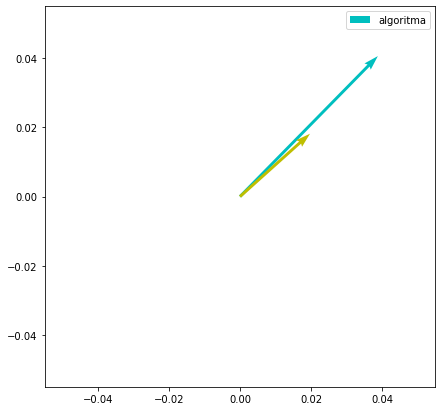

In [249]:
V = np.array([w2v_a, w2v_b])
origin = np.array([[0, 0], [0, 0]])

plt.figure()
plt.figure(figsize=(7, 7))
plt.quiver(*origin, V[:,0], V[:,1], color=['c','y'], scale=10)
plt.legend(['algoritma', 'interface']) # bingung cara ngasih labelnya
plt.show()


5. [12] Buatlah sebuah fungsi yang dapat mengembalikan dokumen relevan menggunakan Word2Vec berdasarkan abstrak jika diberikan sebuah query. Cara kerjanya dapat tapi tidak terbatas seperti berikut:

    a. Untuk menghitung vektor suatu dokumen atau kumpulan kata dapat dilakukan dengan menggabungkan vektor kata (word embedding). Penggabungan juga dapat bervariasi.

    b. Mencari dokumen yang relevan dapat dilakukan dengan menghitung similarity (contoh: cosine similarity) antara representasi vektor query dan vektor dokumen. Seharusnya dokumen dengan similarity tinggi cenderung memiliki relevansi yang tinggi juga.

In [250]:
abstrak_dct_avg_w2v = dict()

for index, abstrak in abstrak_sr_stemmed.iteritems():
    w2v_collections = list()

    # Mengumpulkan vector dari seluruh kata pada dokumen
    for word in abstrak:
        w2v_collections.append(model.wv[word])

    # Menghitung avg vector dari seluruh kata pada dokumen
    abstrak_dct_avg_w2v[index] = np.mean(np.array(w2v_collections), axis=0)

def top_10_abstrak_with_word2vec(query: str):
    """
    Mencari 10 abstrak dengan nilai relevansi tinggi

    Menggunakan algoritma Word2Vec
    """
    query_w2v_collections = list()
    query_w2v_avg = 0

    # Mengumpulkan vector dari query
    for word in nltk.word_tokenize(query):
        # ini ngide, return vektor nol kalo kata ga ketemu
        # gatau bener apa ngga
        try:
            query_w2v_collections.append(model.wv[word])
        except:
            query_w2v_collections.append(np.array([0, 0]))

    # Menghitung avg vector dari seluruh kata pada query
    query_w2v_avg = np.mean(np.array(query_w2v_collections), axis=0)
    print(query_w2v_avg)

    # Menghitung cosine similarity dari vector query dan vector abstrak
    abstrak_cosine_similarity_scores = Counter()

    for index, vector in abstrak_dct_avg_w2v.items():
        abstrak_cosine_similarity_scores[index] = (
            cosine_similarity(
                np.array([query_w2v_avg]),
                np.array([vector]),
            )
        )

    print("Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:")
    pprint(abstrak_cosine_similarity_scores.most_common(10))

    print("\n Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi")
    pprint(top_10_tokenized_abstrak(abstrak_cosine_similarity_scores))

6. [6] Gunakan fungsi yang telah Anda buat untuk mencari 10 abstrak dengan relevansi tertinggi untuk query:

   a. query: information retrieval

   b. query: sistem manajemen pengetahuan

   c. query: knowledge discovery

    a. query: information retrieval

In [251]:
top_10_abstrak_with_word2vec("information retrieval")

[2.084878   0.64907545]
Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(70, array([[0.99983895]], dtype=float32)),
 (380, array([[0.99973786]], dtype=float32)),
 (160, array([[0.99970263]], dtype=float32)),
 (423, array([[0.9987797]], dtype=float32)),
 (57, array([[0.998682]], dtype=float32)),
 (209, array([[0.99801224]], dtype=float32)),
 (31, array([[0.99709594]], dtype=float32)),
 (396, array([[0.996663]], dtype=float32)),
 (273, array([[0.99648416]], dtype=float32)),
 (260, array([[0.99644285]], dtype=float32))]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(70,
              ['analisis',
               'pemanfaatan',
               'media',
               'online',
               'dalam',
               'penyampaian',
               'layanan',
               'informasi',
               'pariwisata',
               'media',
               'online',
               'bermanfaat',
               'sebagai',
               'penyampaian',


    b. query: sistem manajemen pengetahuan

In [252]:
top_10_abstrak_with_word2vec("sistem manajemen pengetahuan")

[1.67579559 0.90445896]
Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(96, array([[0.99999999]])),
 (152, array([[0.99999977]])),
 (468, array([[0.99999973]])),
 (268, array([[0.99999953]])),
 (456, array([[0.99999924]])),
 (280, array([[0.99999801]])),
 (348, array([[0.9999973]])),
 (422, array([[0.99999707]])),
 (411, array([[0.99999688]])),
 (267, array([[0.99999473]]))]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(96,
              ['deteksi',
               'stance',
               'pada',
               'teks',
               'berbahasa',
               'indonesia',
               'menggunakan',
               'fitur',
               'sentimen',
               'ortografi',
               'dan',
               'proper',
               'name',
               'penelitian',
               'ini',
               'bertujuan',
               'untuk',
               'mengembangkan',
               'sebuah',
               'model',
     

    c. query: knowledge discovery

In [253]:
top_10_abstrak_with_word2vec("knowledge discovery")

[1.56402922 0.56196654]
Hasil penghitungan skor; 10 dokumen abstrak dengan skor tertinggi:
[(423, array([[0.99998027]])),
 (160, array([[0.99982442]])),
 (209, array([[0.9998013]])),
 (380, array([[0.99979543]])),
 (70, array([[0.99968304]])),
 (31, array([[0.99945219]])),
 (396, array([[0.99925547]])),
 (273, array([[0.99916971]])),
 (260, array([[0.99914956]])),
 (342, array([[0.99911083]]))]

 Tokenized abstrak; 10 dokumen abstrak dengan skor tertinggi
OrderedDict([(423,
              ['semantic',
               'role',
               'labeling',
               'untuk',
               'bahasa',
               'indonesia',
               'percakapandenganmenggunakandeeplearning',
               'semantic',
               'role',
               'labeling',
               'srl',
               'telah',
               'diteliti',
               'cukup',
               'dalam',
               'terutama',
               'untuk',
               'bahasa',
               'inggris',
         

7. [10] **BONUS**: Anda dapat menggunakan pretrained model word2vec yang sudah dilatih menggunakan korpus wikipedia bahasa Indonesia. Setelah berhasil me-load model tersebut, Anda dapat mencoba menggunakan model tersebut untuk menjawab soal nomor 5 dan 6. Coba ceritakan perbedaan apa yang teman-teman dapatkan tanpa dan dengan pretrained model?

### **D - Dimensionality Reduction (10 Poin)**

1. [2] Buatlah representasi matriks TF-IDF dengan mengalikan nilai tf pada setiap terms di setiap dokumen dan idf dari dokumen tersebut. Gunakan nilai tf dan idf yang Anda dapatkan pada nomor B2. Kemudian tampilkan hasilnya.

In [254]:
abstrak_dct_tfidf = dict()

for doc, abstrak in abstrak_dct_tf.items():
    for word, idf in abstrak_dct_idf.items():
        tf = abstrak.get(word, 0)

        if word in abstrak_dct_tfidf.keys():
            abstrak_dct_tfidf[word].append(tf * idf)
        else:
            abstrak_dct_tfidf[word] =[tf * idf]

abstrak_df_tfidf = pd.DataFrame(data=abstrak_dct_tfidf)
abstrak_df_tfidf.head(10)

,online,metode,secara,kualitas,membeli,didukung,faktor,sebanyak,satisfaction,itu,...,seara,orde,surf,dimunculkan,plot,cotrol,dimanipulasi,interasksi,adlah,conferencing
0,3.579268,0.75231,2.725031,2.313280,3.901441,3.627004,9.415176,2.5832,10.650129,0.973762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.75231,0.000000,0.000000,0.000000,0.000000,5.649106,2.5832,0.000000,0.973762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.908344,4.626561,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.789634,0.00000,0.000000,4.626561,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.908344,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.973762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.789634,0.75231,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,2.725031,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.579268,0.00000,0.000000,0.000000,0.000000,0.000000,3.766070,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.948170,0.00000,5.450062,9.253122,0.000000,0.000000,13.181247,0.0000,10.650129,0.973762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. [3] Berdasarkan hasil yang sudah didapatkan pada nomor 1, lakukan pemprosesan menggunakan PCA (2 komponen), kemudian tampilkan seluruh dokumen dalam bentuk visualisasi PCA di plot euclidean space.

    **Tips**: Bayangkan setiap kata pada korpus berada di posisi kolom, sedangkan nomor dokumen berada di posisi baris, kemudian semua kata yang ada pada korpus akan direduksi menjadi 2 principal component.

In [255]:
pca = PCA(n_components=2)
abstrak_df_tfidf_pca = pca.fit_transform(abstrak_df_tfidf)

print("Sebelum dimensionality reduction w/ PCA:")
display(abstrak_df_tfidf.shape)

print("\n Sesudah dimensionality reduction w/ PCA:")
display(abstrak_df_tfidf_pca.shape)

Sebelum dimensionality reduction w/ PCA:


(469, 7185)


 Sesudah dimensionality reduction w/ PCA:


(469, 2)

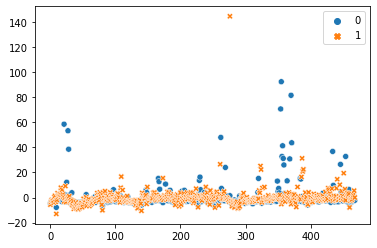

In [256]:
sns.scatterplot(data=abstrak_df_tfidf_pca)
plt.show()

3. [3] Berdasarkan hasil yang sudah didapatkan pada nomor 1, lakukan pemprosesan menggunakan SVD (2 komponen). Anda dapat mencoba menggunakan **TruncatedSVD** pada library scikit-learn untuk menyelesaikannya.

In [257]:
svd = TruncatedSVD(n_components=2)
abstrak_df_tfidf_svd = svd.fit_transform(abstrak_df_tfidf)

print("Sebelum dimensionality reduction w/ SVD:")
display(abstrak_df_tfidf.shape)

print("\n Sesudah dimensionality reduction w/ SVD:")
display(abstrak_df_tfidf_svd.shape)

Sebelum dimensionality reduction w/ SVD:


(469, 7185)


 Sesudah dimensionality reduction w/ SVD:


(469, 2)

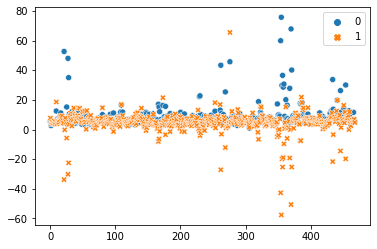

In [258]:
sns.scatterplot(data=abstrak_df_tfidf_svd)
plt.show()

4. [2] Bagaimana hasil yang Anda dapatkan setelah menggunakan PCA dan SVD ? Apakah ada hal unik yang bisa Anda temukan ? Jelaskan analisis singkat Anda minimal 3 kalimat.

Sepenglihatan saya, tidak begitu nampak hal unik pada keduanya, kecuali pada visualisasi. Terlihat bahwa pada hasil scatterplot data yang menggunakan dimensionality reduction dengan SVD, terdapat outlier yang jatuh pada axis y negatif. Nevertheless, keduanya berhasil, dan tidak nampak perbedaan yang signifikan dalam mengkerucutkan dari 7000 dimensi data menjadi 2 dimensi.


### **E - IR Model Evaluation (25 Poin)**

Pada bagian ini, Anda diminta untuk mengevaluasi hasil retrieval dari sistem yang telah Anda buat pada bagian B dan C dan memberikan analisis Anda berdasarkan hasil evaluasi yang Anda dapatkan. Gunakan hanya query “information retrieval” (query nomor a pada B5 dan C6) di bagian ini.

1. [5] Lakukan human judgment (proses manual dalam menilai apakah dokumen yang diperoleh merupakan dokumen yang relevan dengan query yang diberikan) pada 10 abstrak untuk masing-masing hasil retrieval menggunakan BM25 (bagian B) dan Word2Vec (bagian C). Berikan nilai 1 jika Anda anggap abstrak tersebut relevan dengan query awal dan 0 jika tidak. Untuk tugas ini, tidak masalah jika Anda tidak mengetahui secara pasti apakah query benar-benar relevan dengan dokumen yang diperoleh. Yang penting adalah Anda konsisten dalam menilai kedua hasil retrieval. Tampilkan hasil human judgement yang telah Anda buat!

In [259]:
# Helper cell untuk mencari abstrak sesuai index
query_result = abstrak_sr[309]

print(query_result)
dframe = pd.DataFrame([query_result])
dframe.to_clipboard(index=False, header=False)

Pengembangan Desain Interaksi Alternatif Modul e-Learning Berdasarkan Gaya Belajar Felder-Silverman Pembimbing : Harry Budi Santoso S.Kom., M.Kom., Ph.D. Dr. Drs. R. Yugo Kartono Isal M.Sc. Saat ini, belum banyak penelitian mengenai pengembangan desain interaksi untuk sistem e-Learning adaptif berdasarkan gaya belajar yang berhasil menghasilkan desain dengan usability yang baik. Padahal, usability desain interaksi merupakan salah satu hal yang menentukan kesuksesan penyelenggaraan e-Learning. Berangkat dari isu tersebut, penelitian ini membahas pengembangan desain interaksi alternatif untuk modul e-Learning yang disesuaikan terhadap gaya belajar tertentu dalam model Felder- Silverman menggunakan metode User-Centered Design (UCD). Desain interaksi alternatif yang diajukan dikembangkan berdasarkan kebutuhan pengguna, yang diperoleh melalui survei demografi gaya belajar dan wawancara eksploratif. Perancangan desain tersebut juga merujuk pada best-practice perancangan desain interaksi. Des

Asumsi "relevan" berarti memiliki setidaknya memiliki mention kepada query atau sedikit bahasan yang senada dengan definisi dari query

[Analisis & rangkuman tahapan human judgement yang saya lakukan](https://bbbadi.notion.site/Information-Retrieval-7ba6fe99d38c441a9f67f158d509c646
)

Note: R maksudnya Result

|              BM25              | R1 | R2 | R3 | R4 | R5 | R6 | R7 | R8 | R9 | R10 |
|:------------------------------:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:---:|
| "information retrieval"        |  1 |  1 |  1 |  0 |  0 |  0 |  1 |  0 |  0 |  0  |
| "sistem manajemen pengetahuan" |  1 |  1 |  0 |  0 |  1 |  0 |  0 |  1 |  0 |  0  |
| "knowledge discovery"          |  1 |  1 |  1 |  1 |  0 |  1 |  0 |  1 |  1 |  1  |

<br>

|            Word2Vec            | R1 | R2 | R3 | R4 | R5 | R6 | R7 | R8 | R9 | R10 |
|:------------------------------:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:---:|
| "information retrieval"        |  0 |  0 |  0 |  0 |  0 |  0 |  0 |  0 |  0 |  0  |
| "sistem manajemen pengetahuan" |  0 |  1 |  1 |  1 |  0 |  0 |  0 |  0 |  0 |  0  |
| "knowledge discovery"          |  0 |  1 |  0 |  0 |  0 |  1 |  0 |  1 |  0 |  0  |

2. [10] Berdasarkan hasil dari nomor 1, hitung P@1 (precision-at-1), P@3, P@5, Mean Average Precision (MAP) dengan micro average, dan MAP dengan macro average dari hasil retrieval Anda untuk BM25 dan Word2Vec. Anda boleh melakukan perhitungan ini secara manual ataupun otomatis.

Query "information retrieval"
- BM25
  - P@1: 1/1
  - P@3: 3/3
  - P@5: 3/5
- Word2Vec
  - P@1: 0/1
  - P@3: 0/3
  - P@5: 0/5

Query "sistem manajemen pengetahuan"
- BM25
  - P@1: 1/1
  - P@3: 2/3
  - P@5: 3/5
- Word2Vec
  - P@1: 0/1
  - P@3: 2/3
  - P@5: 3/5

Query "knowledge discovery"
- BM25
  - P@1: 1/1
  - P@3: 3/3
  - P@5: 4/5
- Word2Vec
  - P@1: 0/1
  - P@3: 1/3
  - P@5: 1/5

MAP Macro
- BM25: 
- Word2Vec: 

MAP Micro
- BM25:
- Word2Vec: 

3. [7] Andaikan pada ground truth terdapat 5 item yang relevan dan berdasarkan hasil dari nomor 1, hitung R@1 (recall-at-1), R@3, R@5 dari hasil retrieval Anda untuk BM25 dan Word2Vec. Anda boleh melakukan ini secara manual maupun otomatis.

Query "information retrieval"
- BM25
  - R@1: 1/4
  - R@3: 2/4
  - R@5: 3/4
- Word2Vec
  - R@1: 0/0
  - R@3: 0/0
  - R@5: 0/0


Query "sistem manajemen pengetahuan"
- BM25
  - R@1: 1/4
  - R@3: 2/4
  - R@5: 3/4
- Word2Vec
  - R@1: 0/3
  - R@3: 2/3
  - R@5: 3/3


Query "knowledge discovery"
- BM25
  - R@1: 1/8
  - R@3: 3/8
  - R@5: 4/8
- Word2Vec
  - R@1: 0/3
  - R@3: 1/3
  - R@5: 1/3


4. [3] Berdasarkan hasil dari nomor-nomor sebelumnya di bagian ini, lakukan analisis perbandingan mana yang lebih baik antara model BM25 atau Word2Vec. Sertakan penjelasan singkat dalam 3-5 kalimat terkait hasil yang didapatkan tersebut.

Dalam kasus ini, pendekatan yang lebih baik adalah BM25

Hal ini bisa saja dikarenakan pada tahapan Word2Vec, dilakukan stemming terlebih dahulu. Sehingga pada query "sistem manajemen pengetahuan", yang memiliki kata dasar "sistem (manage/manajemen) tahu", menjadikan cakupan query menjadi meluas. Dalam hal ini, konteks juga penting, dengan mempertimbangkan document length rerata yang serupa dari 466 abstrak yang ada, maka pembobotan kata pada BM25 menjadi lebih diunggulkan.